# Homework 6

All the work is my own, no code was shared with anyone else.

## Q1
Consider the ODE 

$\frac{dy}{dt} = -1.2y + 7e^{-0.3t}; y(t=0) = 3 $

The solution to the IVP is 

$y = \frac{70}{9} e^{-0.3t} -\frac{43}{9} e^{-1.2t}$

a) Plot the above solution between $0 \le t \le 30$

b) Solve the ODE numerically for the time span using Euler explicit method. Study the accuracy of the solution WRT the actual solution (use 5, 10, 100, 1000 intervals) and solve for each case.


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

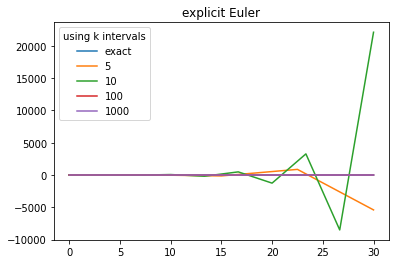

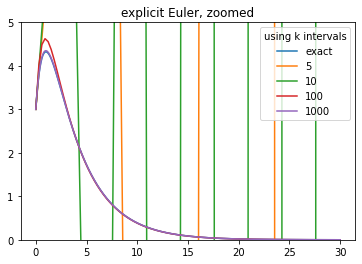

In [ ]:
def dy_dt(y,t):
  return -1.2*y + 7*np.exp(-0.3*t)

def y_exact(t):
  return (70/9)*np.exp(-0.3*t) - (43/9)*np.exp(-1.2*t)

tmax = 30.
intervals = np.array([5, 10, 100, 1000])
h = tmax / intervals
y0 = 3.0 # initial condition
# print(h)

ts = np.linspace(0,tmax,int(tmax/0.1)) # the discretization of time
t_5 = np.linspace(0,tmax,intervals[0])
t_10 = np.linspace(0,tmax,intervals[1])
t_100 = np.linspace(0,tmax,intervals[2])
t_1000 = np.linspace(0,tmax,intervals[3])

y_5 = np.zeros_like(t_5)
y_5[0] = y0
y_10 = np.zeros_like(t_10)
y_10[0] = y0
y_100 = np.zeros_like(t_100)
y_100[0] = y0
y_1000 = np.zeros_like(t_1000)
y_1000[0] = y0

for i in range(0,4):
  y_5[i+1] = (h[0] * dy_dt(y_5[i], t_5[i])) + y_5[i]

for j in range(0,9):
  y_10[j+1] = (h[1] * dy_dt(y_10[j], t_10[j])) + y_10[j]

for k in range(0,99):
  y_100[k+1] = (h[2] * dy_dt(y_100[k], t_100[k])) + y_100[k]

for l in range(0,999):
  y_1000[l+1] = (h[3] * dy_dt(y_1000[l], t_1000[l])) + y_1000[l]

plt.figure
plt.plot(ts, y_exact(ts),label='exact')
plt.plot(t_5, y_5,label='5')
plt.plot(t_10, y_10,label='10')
plt.plot(t_100, y_100,label='100')
plt.plot(t_1000, y_1000,label='1000')
plt.legend(title='using k intervals')
plt.title("explicit Euler")
# plt.ylim(0,5)
plt.show()

plt.figure
plt.plot(ts, y_exact(ts),label='exact')
plt.plot(t_5, y_5,label='5')
plt.plot(t_10, y_10,label='10')
plt.plot(t_100, y_100,label='100')
plt.plot(t_1000, y_1000,label='1000')
plt.legend(title='using k intervals')
plt.title("explicit Euler, zoomed")
plt.ylim(0,5)
plt.show()



In [ ]:
# also tried to solve problem 1 using odeint
# did not want to throw away the code

# Tried to do this all in one loop:::

# for k in intervals:
#   ts = np.linspace(0,tmax,k)
#   y_sol = odeint(dy_dt, y0, ts) 
#   y_sol = np.array(y_sol).flatten() # this is the numerical solution, flattened because output from ys is not one-dimensional
#   plt.plot(ts,y_sol, label=k)
  
# Also works split out:::

# t_5 = np.linspace(0,tmax,5)
# y_5 = odeint(dy_dt, y0, t_5) 
# y_5 = np.array(y_5).flatten()
# plt.plot(t_5, y_5,label='5')

# t_10 = np.linspace(0,tmax,10) 
# y_10 = odeint(dy_dt, y0, t_10) 
# y_10 = np.array(y_10).flatten()
# plt.plot(t_10, y_10,label='10')

# t_100 = np.linspace(0,tmax,100) 
# y_100 = odeint(dy_dt, y0, t_100) 
# y_100 = np.array(y_100).flatten()
# plt.plot(t_100, y_100,label='100')

# t_1000 = np.linspace(0,tmax,1000) 
# y_1000 = odeint(dy_dt, y0, t_1000) 
# y_1000 = np.array(y_1000).flatten()
# plt.plot(t_1000, y_1000,label='1000')

# plt.legend("Using k intervals:")
# plt.show()

## Q2#

Use odeint/ivp_solve for this problem. Consider the equation of the pendulum as derived in the first class

$ L \frac{d^2 \theta}{dt^2} + g \sin(\theta) \quad ; \quad \theta(0) = A \quad ; \quad \frac{d\theta}{dt}(0) = B $

where $L$ is the length of the pendulum and $g$ is the acceleration due to gravity.

A) Write the above second order ODE as a system of two first order ODEs. Clearly specify the resulting initial conditions as well.

> $ \frac{d\theta}{dt} = z \quad ; \quad  \theta(0) = A $

> $ \frac{dz}{dt} = -\frac{g}{L}sin(\theta) \quad ; \quad z(0) = B $

B) Consider intial conditions $A = \frac{\pi}{100}, B = 0$. Plot linearized solution $\theta(t) = A \cos(\sqrt{\frac{g}{L}}t) $ on same plot as solution for $\theta(t)$ for $0 \le t \le 2 $ .

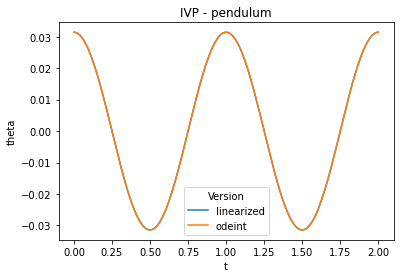

In [ ]:
def dU_dt(U, t):
  u,z = U[0], U[1]
  F = np.empty(2)

  F[0] = z
  F[1] = -(g/L)*np.sin(u)
  return F

g = -9.81
L = g/((2* np.pi)**2)
A = np.pi/100

U0 = [ A , 0]
h, tmax = 0.01, 2
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

theta_linearized = A * np.cos(np.sqrt(g/L)*ts)

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum")
plt.plot(ts, theta_linearized, label='linearized')
plt.plot(ts, ys, label='odeint')
plt.legend(title="Version")
plt.show()


> That appears to be a dead-on match, so a very good approximation.

C) Consider intial conditions $A = \frac{\pi}{10}, B = 0$. For these parameters plot the solution on [0,2]. Can you say whether the linearized formulation still applies to this case or not?

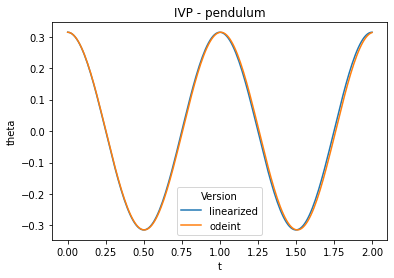

In [ ]:
A = np.pi/10

U0 = [ A , 0]
h, tmax = 0.01, 2
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

theta_linearized = A * np.cos(np.sqrt(g/L)*ts)

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum")
plt.plot(ts, theta_linearized, label='linearized')
plt.plot(ts, ys, label='odeint')
plt.legend(title="Version")
plt.show()

> Now with the different constraint, the approximation is still good but not perfect.

D) Consider intial conditions $A = \frac{\pi}{2}, B = 0$. For these parameters plot the solution on [0,2]. Can you say whether the linearized formulation still applies to this case or not?

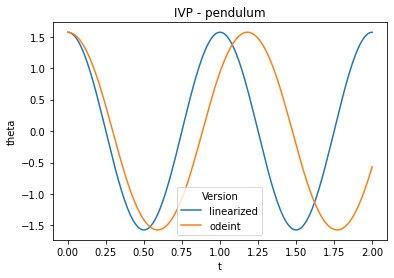

In [ ]:
A = np.pi/2

U0 = [ A , 0]
h, tmax = 0.01, 2
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

theta_linearized = A * np.cos(np.sqrt(g/L)*ts)

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum")
plt.plot(ts, theta_linearized, label='linearized')
plt.plot(ts, ys, label='odeint')
plt.legend(title="Version")
plt.show()

> Now the match is getting much worse.

E) Consider intial conditions $A = \pi, B = 0$. For these parameters plot the solution on [0,2]. Can you say whether the linearized formulation still applies to this case or not?

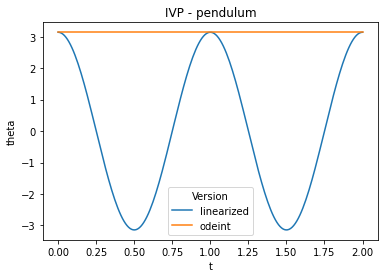

In [ ]:
A = np.pi

U0 = [ A , 0]
h, tmax = 0.01, 2
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

theta_linearized = A * np.cos(np.sqrt(g/L)*ts)

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum")
plt.plot(ts, theta_linearized, label='linearized')
plt.plot(ts, ys, label='odeint')
plt.legend(title="Version")
plt.show()

> Now there is almost no realistic correlation between the approximation and the solution.



F) Consider intial conditions $A = \pi, B = 0.1$. For these parameters plot the solution on [0,2]. How do you explain this result physically?

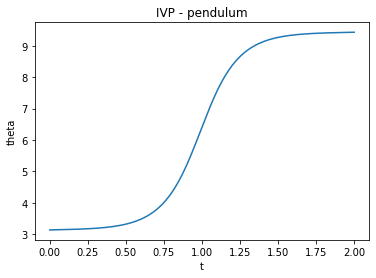

In [ ]:
A = np.pi

U0 = [ A , 0.1]
h, tmax = 0.01, 2
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum")
plt.plot(ts, ys)
plt.show()

> In this case, there was an initial angular velocity included such that the solution looks very different.

> I also did plot this on a longer timeline and I don't think this has worked correctly:

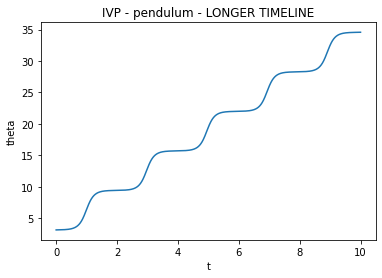

In [ ]:
A = np.pi

U0 = [ A , 0.1]
h, tmax = 0.01, 10
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
ys = Us[:,0]

plt.xlabel("t")
plt.ylabel("theta")
plt.title("IVP - pendulum - LONGER TIMELINE")
plt.plot(ts, ys)
plt.show()

> But this can be due to the challenge of some ODEs being not everywhere-solvable.